## 이미지 데이터(Indiana university (chest x-rays))  전처리 방법 

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df_pro = pd.read_csv("C:/Users/user/Desktop/학부 연구생/프로젝트/archive/indiana_projections.csv")
df_pro

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


In [6]:
df_re = pd.read_csv("C:/Users/user/Desktop/학부 연구생/프로젝트/archive/indiana_reports.csv", index_col=0)
df_re

,MeSH,Problems,image,indication,comparison,findings,impression
uid,,,,,,,
1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...
3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."


In [7]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3851 entries, 1 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MeSH        3851 non-null   object
 1   Problems    3851 non-null   object
 2   image       3851 non-null   object
 3   indication  3765 non-null   object
 4   comparison  2685 non-null   object
 5   findings    3337 non-null   object
 6   impression  3820 non-null   object
dtypes: object(7)
memory usage: 240.7+ KB


In [8]:
df_pro.drop(df_pro[df_pro['projection']=='Lateral'].index, inplace=True)
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 0 to 7464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         3818 non-null   int64 
 1   filename    3818 non-null   object
 2   projection  3818 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.3+ KB


### 이미지 전처리 1 (회전,수평 및 수직 플립,무작위 자르기,밝기조정...)

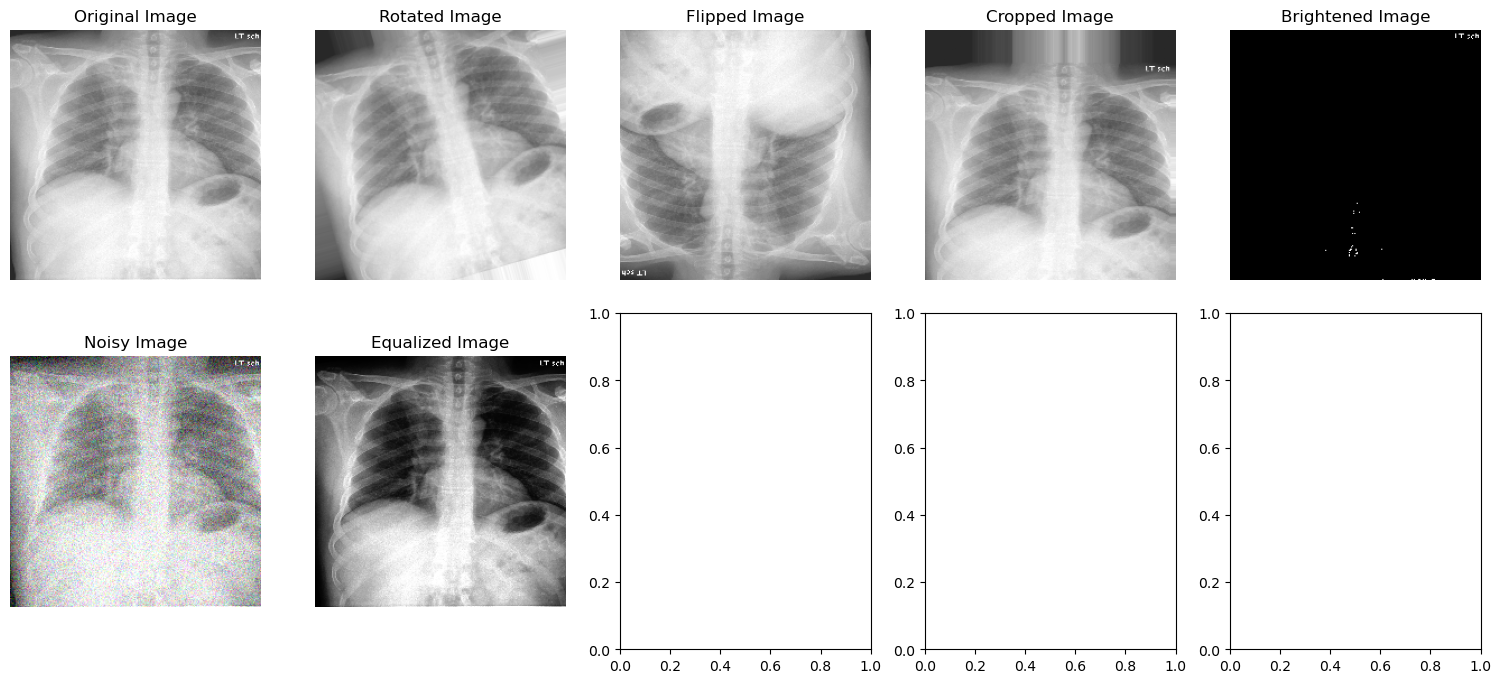

In [22]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# 이미지 디렉토리 경로
image_dir = r'C:/Users/user/Desktop/images_normalized'

# 첫 번째 이미지를 로드
img_file = os.listdir(image_dir)[0]  # 첫 번째 이미지 선택 (테스트용)
img_path = os.path.join(image_dir, img_file)

# 이미지 로드 및 전처리
img = load_img(img_path, target_size=(224, 224))  # 크기 조정
img_array = img_to_array(img) / 255.0  # 이미지 정규화 (0~1 범위로)

# 10가지 전처리 방법을 적용

# 1. 원본 이미지
original_img = img_array

# 2. 회전 (Rotation)
datagen = ImageDataGenerator(rotation_range=40)
rotated_img = datagen.random_transform(img_array)

# 3. 수평 및 수직 플립 (Horizontal and Vertical Flip)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
flipped_img = datagen.random_transform(img_array)

# 4. 무작위 자르기 (Random Cropping)
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
cropped_img = datagen.random_transform(img_array)

# 5. 밝기 조정 (Brightness Adjustment)
datagen = ImageDataGenerator(brightness_range=[0.2, 2.0])
bright_img = datagen.random_transform(img_array)


# 7. 노이즈 추가 (Noise Addition)
def add_noise(img_array):
    noise = np.random.normal(0, 0.1, img_array.shape)
    noisy_img = img_array + noise
    return np.clip(noisy_img, 0, 1)  # 이미지 값이 [0, 1] 범위를 벗어나지 않게 클리핑

noisy_img = add_noise(img_array)

# 8. 히스토그램 평활화 (Histogram Equalization)
img_gray = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
equalized_img = cv2.equalizeHist(img_gray)

# 9. 회전 및 이동 (Shear and Zoom)
datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2)
sheared_zoomed_img = datagen.random_transform(img_array)

# 10. 흑백 변환 (Grayscale Conversion)
img_gray = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
grayscale_img = img_gray / 255.0  # 다시 정규화

# 이미지 출력
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# 1. 원본 이미지
axes[0, 0].imshow(original_img)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# 2. 회전 (Rotation)
axes[0, 1].imshow(rotated_img)
axes[0, 1].set_title("Rotated Image")
axes[0, 1].axis('off')

# 3. 수평 및 수직 플립 (Flip)
axes[0, 2].imshow(flipped_img)
axes[0, 2].set_title("Flipped Image")
axes[0, 2].axis('off')

# 4. 무작위 자르기 (Random Cropping)
axes[0, 3].imshow(cropped_img)
axes[0, 3].set_title("Cropped Image")
axes[0, 3].axis('off')

# 5. 밝기 조정 (Brightness Adjustment)
axes[0, 4].imshow(bright_img)
axes[0, 4].set_title("Brightened Image")
axes[0, 4].axis('off')

# 7. 노이즈 추가 (Noise Addition)
axes[1, 0].imshow(noisy_img)
axes[1, 0].set_title("Noisy Image")
axes[1, 0].axis('off')

# 8. 히스토그램 평활화 (Histogram Equalization)
axes[1, 1].imshow(equalized_img, cmap='gray')
axes[1, 1].set_title("Equalized Image")
axes[1, 1].axis('off')


# 여백을 없애고 이미지를 꽉 차게 배치
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
plt.show()


#### 1.회전(rotation)
#### :40도 이내로 이미지를 랜덤 회전.<br>
#### 2.수평 및 수직 플립 (Flip)
#### :이미지를 랜덤으로 수평 및 수직 반전.<br>
#### 4. 무작위 자르기 (Random Cropping)
#### :이미지의 위치를 랜덤으로 이동하여 자르기 효과.<br>
#### 5. 밝기 조정 (Brightness Adjustment)
#### :이미지의 밝기를 조정.<br>
#### 6. 노이즈 추가 (Noise Addition)
#### :가우시안 노이즈 추가.        <br>
#### 7. 히스토그램 평활화 (Histogram Equalization)
#### :이미지의 밝기 분포를 평탄화.<br>
#### @ 가우시안 노이즈:이미지, 신호 또는 데이터를 왜곡시키기 위해 추가되는 랜덤 노이즈
--------------------------------------------------------------------------------

## 이미지 전처리 2(이미지 밝기 증가/감소,이미지 대비 증가/감소......)

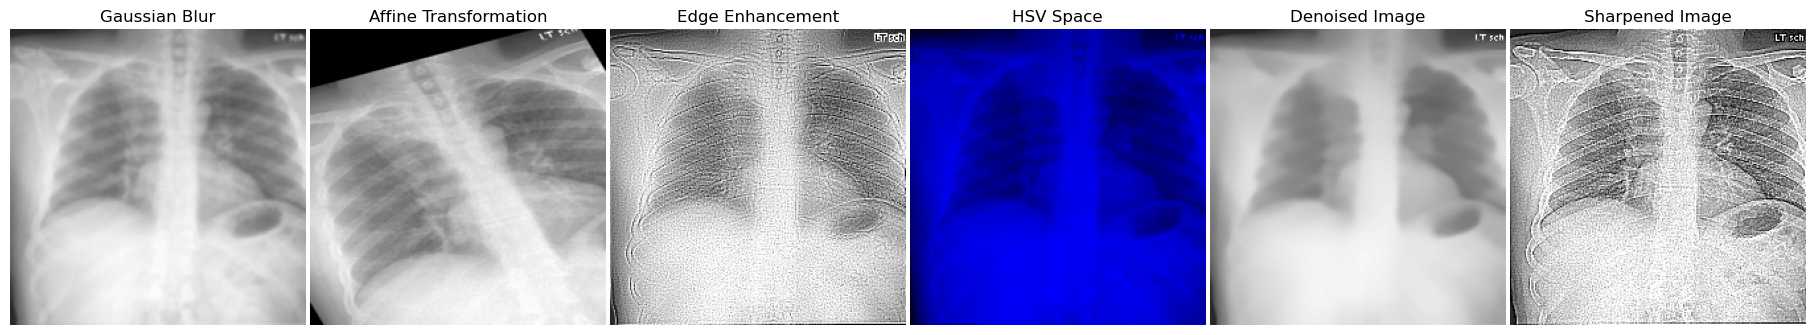

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 10가지 전처리된 이미지를 출력
fig, axes = plt.subplots(1, 6, figsize=(18, 3))

# 3. 가우시안 블러
axes[0].imshow(blurred_img)
axes[0].set_title("Gaussian Blur")
axes[0].axis('off')

# 4. 모핑 (Affine Transformation)
axes[1].imshow(affine_img)
axes[1].set_title("Affine Transformation")
axes[1].axis('off')

# 5. 엣지 강조
axes[2].imshow(edge_img)
axes[2].set_title("Edge Enhancement")
axes[2].axis('off')

# 7. 색상 공간 변환 (HSV)
axes[3].imshow(hsv_img)
axes[3].set_title("HSV Space")
axes[3].axis('off')

# 8. 노이즈 제거
axes[4].imshow(denoised_img)
axes[4].set_title("Denoised Image")
axes[4].axis('off')

# 9. 샤프닝
axes[5].imshow(sharpened_img)
axes[5].set_title("Sharpened Image")
axes[5].axis('off')

# 여유 공간을 제거하고, 이미지를 꽉 채우도록 조정
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()


#### 1. 이미지 가우시안 블러 (Gaussian Blur)
#### : 이미지를 흐리게 만들어 노이즈를 제거하거나 특정 특징을 약화시킵니다. <br>
#### 2. 이미지 모핑 (Affine Transformation)
#### : 이미지를 평행 이동, 회전, 스케일 조정 등으로 변환합니다. <br>
#### 3. 이미지 엣지 강조 (Edge Enhancement)
#### : 이미지에서 가장자리나 경계선을 강조하여 중요한 특징을 부각시킵니다.<br>
#### 4. 색상 공간 변환 (HSV, LAB 등)
#### : RGB를 HSV 또는 LAB 색 공간으로 변환하여 색상 정보를 다양화합니다.<br>
#### 5. 이미지 노이즈 제거 (Denoising)
#### : 이미지를 부드럽게 하여 원하지 않는 노이즈를 제거합니다.<br>
#### 6. 샤프닝 (Sharpening)
#### : 이미지를 선명하게 하여 중요한 세부 정보를 강조합니다.<br>

-----------------------

### referce
##### Machine Learning & Deep Learning 0310 - 이미지 데이터 전처리 2020. 3. 10. 15:29 <https://ivo-lee.tistory.com/91>
##### OpenCV Development Team. "Image Processing in OpenCV." OpenCV Official Documentation, 2025.[https://docs.opencv.org/4.x/da/d6e/tutorial_py_image_arithmetics.html](https://docs.opencv.org/4.x/da/d6e/tutorial_py_image_arithmetics.html)
